In [84]:
# Importing the dependencies
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Loading traing data
data = pd.read_csv('C:/Users/Akhilesh/OneDrive/Desktop/Titanic/train.csv')

# Printing basic Info
data.info()
# print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploring Data 

In [85]:
# The first few rows of the dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them. 

Here Parch min value is 0 and max value is 6 that means its a counter same for SibSp

Most people where traveling alone


In [87]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

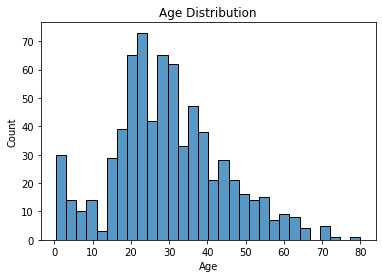

In [88]:
sns.histplot(data['Age'], bins=30)
plt.title('Age Distribution')
plt.show()

## Correltions 
Correlations for survival This will help get the idea of data

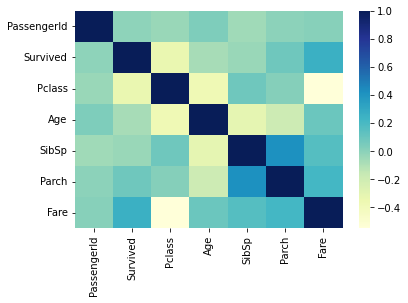

In [89]:
sns.heatmap(data.corr(), cmap="YlGnBu") #yellow Green Blue
plt.show()

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

Here we can see the personal calss (Pclass) is highly negetively corelated Which measn lower the number in Pclass the higher the survial rate.
lower number(1) stands for Upper calss that means upper class had hiher servival rate.

We can back this up by looking at Fare price on the heatmap which is positivily correlated the more people paid for the ticket higher the servival rate.

Pclass and Fare it self are correlated


# Spliting into traing and testing data set
I will test it with the test.csv after our model production


I am using Stratified shuffel Split 

In [90]:
split = StratifiedShuffleSplit (n_splits=1, test_size=0.3) #test size split 30%

for train_indices, test_indices in split.split (data, data[["Survived", "Pclass", "Sex"]]): #high importance data
    strat_train_set = data.loc[train_indices]
    strat_test_set = data.loc[test_indices]


In [91]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S


The Split is random thats why we dont have any order
To make sense I will add a plot

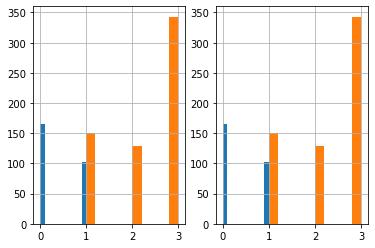

In [92]:
plt.subplot(1,2,1)
strat_test_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.show()

Both the graphs look similar so we have a good distribution

In [93]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 669 to 681
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          498 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        144 non-null    object 
 11  Embarked     621 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


# Pipeline

## Estimation
We can see we have missing values for the Age. To deal with it I can drop it but I will impute. I belive Imputing is better than dropping data. I dont wanna loose data.

I am going to drop Cabin data beacuse it has no significance

I will use Mean to Assign missing values

In [94]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X 

## Encoding Features Numericaly 

Making the Data Binary

embarke - Port of Embarkation 
C = Cherbourg, Q = Queenstown, S = Southampton

I am going to Transform them into 0 or 1 
same for the Male and Female

In [95]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C","S","Q","N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Male","Female"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X
    # def transform(self, X):
    #     encoder = OneHotEncoder(sparse=False)
    #     embarked_encoded = encoder.fit_transform(X[['Embarked']].fillna('Missing'))
    #     embarked_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))
    #     # Drop the first column
    #     embarked_df = embarked_df.iloc[:, 1:]
        
    #     sex_encoded = encoder.fit_transform(X[['Sex']])
    #     sex_df = pd.DataFrame(sex_encoded, columns=encoder.get_feature_names_out(['Sex']))
    #     # Drop the first column
    #     sex_df = sex_df.iloc[:, 1:]
        
    #     X = pd.concat([X.reset_index(drop=True), embarked_df, sex_df], axis=1)
    #     return X

## Dropping unwanted features

In [96]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X ,y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [97]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("fetureencoder",FeatureEncoder()),
                     ("featuredropper",FeatureDropper())])

In [98]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [99]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 669 to 681
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Age          623 non-null    float64
 4   SibSp        623 non-null    int64  
 5   Parch        623 non-null    int64  
 6   Fare         623 non-null    float64
 7   C            623 non-null    float64
 8   S            623 non-null    float64
 9   Q            623 non-null    float64
 10  Male         623 non-null    float64
 11  Female       623 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 63.3 KB


Now we can see we got no missing values

In [100]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Survived"], axis=1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()


In [101]:
X_data

array([[ 0.89156552, -1.56586642,  0.        , ...,  0.61012023,
         1.35821532, -1.35821532],
       [-1.16176434, -0.36889123, -0.80553806, ...,  0.61012023,
        -0.73626029,  0.73626029],
       [ 0.48011584,  0.82808396,  0.        , ...,  0.61012023,
         1.35821532, -1.35821532],
       ...,
       [ 0.78576417,  0.82808396, -2.1114908 , ...,  0.61012023,
         1.35821532, -1.35821532],
       [-0.5583048 , -1.56586642,  1.57590518, ..., -1.63902121,
         1.35821532, -1.35821532],
       [ 0.93858834, -1.56586642, -0.19097206, ..., -1.63902121,
        -0.73626029,  0.73626029]])

## Random Forest Classifer

Now that I have the model in the format I needed. I am going to train the model and evaluate the model on the full data.

For my model I am going to use Random Forest Classifer beacuse I think we can model this data as a decison tree. Random forset calssifer uses multiple decison trees.


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_gird = [
     {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
 ]
grid_search = GridSearchCV(clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

# Result

In [103]:
final_clf = grid_search.best_estimator_

In [104]:
final_clf

RandomForestClassifier(n_estimators=10)

In [105]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [106]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
713,714,0,3,29.000000,0,0,9.4833,0.0,0.0,1.0,0.0,1.0
773,774,0,3,30.190602,0,0,7.2250,1.0,0.0,0.0,0.0,1.0
314,315,0,2,43.000000,1,1,26.2500,0.0,0.0,1.0,0.0,1.0
874,875,1,2,28.000000,1,0,24.0000,1.0,0.0,0.0,1.0,0.0
330,331,1,3,30.190602,2,0,23.2500,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
455,456,1,3,29.000000,0,0,7.8958,1.0,0.0,0.0,0.0,1.0
62,63,0,1,45.000000,1,0,83.4750,0.0,0.0,1.0,0.0,1.0
65,66,1,3,30.190602,1,1,15.2458,1.0,0.0,0.0,0.0,1.0
164,165,0,3,1.000000,4,1,39.6875,0.0,0.0,1.0,0.0,1.0


In [107]:
X_test = strat_test_set.drop(["Survived"], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()


## Accuracy Score


In [108]:
final_clf.score(X_data_test, y_data_test)

0.8283582089552238

In [109]:
final_data = pipeline.fit_transform(data)

In [110]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [111]:
X_final = final_data.drop (['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()


In [112]:
prod_clf = RandomForestClassifier()
param_gird = [
     {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
 ]
grid_search = GridSearchCV(prod_clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [150]:
prod_final_clf = grid_search.best_estimator_

In [151]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=10)

In [156]:
titanic_test_data = pd.read_csv(('test.csv'))

In [157]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [158]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)
# scaler = StandardScaler()
# scaler.fit(final_test_data)  # Assuming X_train is your training data
# X_train_scaled = scaler.transform(final_test_data)

# X_final_test = final_test_data
# X_final_test = X_final_test.fillna(method="ffill")
# X_data_final_test = scaler.transform(X_final_test) 

# predictions = prod_final_clf.predict(X_data_final_test)



In [160]:
predictions = prod_final_clf.predict(X_data_final_test)

In [162]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"] = predictions
final_df.to_csv("prediction.csv", index=False)

In [163]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
